# Exploratory Data Analysis (Referral)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Referral_Join_Prediction.csv')

In [3]:
df.head()

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
0,1,28,5.0,Delhi,106,89.0,72,87.0,83.0,Male,123.0,10.00,33.04,?,10.0,3,141,EL0,Yes
1,2,26,3.0,Pune,65,63.0,77,94.0,85.0,Male,83.0,6.09,27.39,20.87,10.0,10,80,ML0,Yes
2,3,23,2.0,Mumbai,45,92.0,85,84.0,72.0,Male,62.0,41.74,2.61,40.00,2.0,1,60,EL0,No
3,4,29,6.0,Bangalore,126,60.0,95,95.0,67.0,Male,146.0,31.30,9.13,23.48,9.0,3,142,ML0,Yes
4,5,26,3.0,Mumbai,65,92.0,70,80.0,92.0,Female,83.0,25.65,30.43,16.52,7.0,4,89,EL0,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
referral_id                            499 non-null int64
referral_age                           499 non-null int64
referral_exp_in_years                  499 non-null float64
referral_preferred_city                499 non-null object
referral_current_salary                499 non-null int64
referral_10_th_marks                   498 non-null float64
referral_12th_marks                    499 non-null int64
referral_graduation_marks              498 non-null float64
referral_post_grad_marks               498 non-null float64
referral_gender                        499 non-null object
referral_expected_sal                  497 non-null float64
referral_aptitude_numerical_score      496 non-null object
referral_aptitude_verbal_score         489 non-null float64
referral_aptitude_reasoning_score      495 non-null object
referral_Management_Interview_score    498 non-null float64
referra

In [5]:
# There are total number of 
# rows - 499
# columns 19
# target column -> Joined

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
referral_id,499.0,250.000000,144.193157,1.00,125.50,250.00,374.50,499.00
referral_age,499.0,27.020040,2.811979,20.00,25.00,27.00,29.00,65.00
referral_exp_in_years,499.0,4.053307,2.609814,1.00,2.00,4.00,6.00,42.00
referral_current_salary,499.0,86.472946,52.566584,25.00,45.00,85.00,126.00,853.00
referral_10_th_marks,498.0,77.295181,11.128083,-1.00,68.00,78.00,87.00,103.00
referral_12th_marks,499.0,77.478958,10.932113,12.00,69.00,77.00,87.00,95.00
referral_graduation_marks,498.0,77.096386,10.812223,-1.00,68.00,77.00,86.00,104.00
referral_post_grad_marks,498.0,78.269076,10.478487,60.00,69.00,78.00,88.75,101.00
referral_expected_sal,497.0,108.692153,58.722281,40.00,62.00,103.00,143.00,870.00
referral_aptitude_verbal_score,489.0,21.840491,12.338425,0.43,11.74,20.87,32.61,43.48


referral_graduation_marks and referral_10_th_marks having some negative values. It can treated as outliers
referral_expected_sal,referral_aptitude_verbal_score having some missing values  - 

# Bad Value Treatment

In [7]:
df.isnull().sum()

referral_id                             0
referral_age                            0
referral_exp_in_years                   0
referral_preferred_city                 0
referral_current_salary                 0
referral_10_th_marks                    1
referral_12th_marks                     0
referral_graduation_marks               1
referral_post_grad_marks                1
referral_gender                         0
referral_expected_sal                   2
referral_aptitude_numerical_score       3
referral_aptitude_verbal_score         10
referral_aptitude_reasoning_score       4
referral_Management_Interview_score     1
referral_HR_Interview_score             0
Salary offered                          0
Emp_Salary_Grade                        0
Joined                                  0
dtype: int64

In [8]:
# Replacing mean value if referral_10_th_marks is null 
df['referral_10_th_marks'] = np.where(df['referral_10_th_marks'].isnull(),df['referral_10_th_marks'].mean(),df['referral_10_th_marks'])

In [9]:
# # Replacing mean value if referral_10_th_marks is negative

df['referral_10_th_marks'] = np.where(df['referral_10_th_marks'] < 0,df['referral_10_th_marks'].mean(),df['referral_10_th_marks'])

In [10]:
df[(df['referral_graduation_marks'].isnull()) | (df['referral_graduation_marks']< 0 )]

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
92,93,27,4.0,Bangalore,85,88.0,78,NaN,86.0,Female,103.0,12.17,31.74,37.39,6.0,10,101,EL0,No
270,271,29,6.0,Bangalore,126,82.0,88,-1.0,64.0,Male,143.0,10.43,27.39,27.83,1.0,6,141,ML0,No


In [11]:
df['referral_graduation_marks'] = np.where((df['referral_graduation_marks'].isnull()) | (df['referral_graduation_marks']< 0 ),df['referral_graduation_marks'].mean(),df['referral_10_th_marks'])

In [12]:
df[(df['referral_graduation_marks'].isnull()) | (df['referral_graduation_marks']< 0 )]

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined


In [13]:
df.isnull().sum()

referral_id                             0
referral_age                            0
referral_exp_in_years                   0
referral_preferred_city                 0
referral_current_salary                 0
referral_10_th_marks                    0
referral_12th_marks                     0
referral_graduation_marks               0
referral_post_grad_marks                1
referral_gender                         0
referral_expected_sal                   2
referral_aptitude_numerical_score       3
referral_aptitude_verbal_score         10
referral_aptitude_reasoning_score       4
referral_Management_Interview_score     1
referral_HR_Interview_score             0
Salary offered                          0
Emp_Salary_Grade                        0
Joined                                  0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
referral_id                            499 non-null int64
referral_age                           499 non-null int64
referral_exp_in_years                  499 non-null float64
referral_preferred_city                499 non-null object
referral_current_salary                499 non-null int64
referral_10_th_marks                   499 non-null float64
referral_12th_marks                    499 non-null int64
referral_graduation_marks              499 non-null float64
referral_post_grad_marks               498 non-null float64
referral_gender                        499 non-null object
referral_expected_sal                  497 non-null float64
referral_aptitude_numerical_score      496 non-null object
referral_aptitude_verbal_score         489 non-null float64
referral_aptitude_reasoning_score      495 non-null object
referral_Management_Interview_score    498 non-null float64
referra

In [15]:
df['referral_aptitude_numerical_score'] = np.where(df['referral_aptitude_numerical_score'].isnull(),-1,df['referral_aptitude_numerical_score'])
df['referral_aptitude_numerical_score'] = np.where(df['referral_aptitude_numerical_score']=='?',-1,df['referral_aptitude_numerical_score'])

df['referral_aptitude_numerical_score'] =df['referral_aptitude_numerical_score'].astype(float)

df['referral_aptitude_reasoning_score'] = np.where(df['referral_aptitude_reasoning_score'].isnull(),-1,df['referral_aptitude_reasoning_score'])
df['referral_aptitude_reasoning_score'] = np.where(df['referral_aptitude_reasoning_score']=='?',-1,df['referral_aptitude_reasoning_score'])

df['referral_aptitude_reasoning_score'] =df['referral_aptitude_reasoning_score'].astype(float)

In [16]:
cols = ['referral_post_grad_marks','referral_expected_sal','referral_expected_sal','referral_aptitude_numerical_score','referral_aptitude_verbal_score','referral_aptitude_reasoning_score','referral_Management_Interview_score']

for col in cols:
    df[col] = np.where((df[col].isnull()) | (df[col] < 0),df[col].mean(),df[col])

In [17]:
df.isnull().sum()

referral_id                            0
referral_age                           0
referral_exp_in_years                  0
referral_preferred_city                0
referral_current_salary                0
referral_10_th_marks                   0
referral_12th_marks                    0
referral_graduation_marks              0
referral_post_grad_marks               0
referral_gender                        0
referral_expected_sal                  0
referral_aptitude_numerical_score      0
referral_aptitude_verbal_score         0
referral_aptitude_reasoning_score      0
referral_Management_Interview_score    0
referral_HR_Interview_score            0
Salary offered                         0
Emp_Salary_Grade                       0
Joined                                 0
dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
referral_id,499.0,250.000000,144.193157,1.00,125.50,250.000000,374.500,499.00
referral_age,499.0,27.020040,2.811979,20.00,25.00,27.000000,29.000,65.00
referral_exp_in_years,499.0,4.053307,2.609814,1.00,2.00,4.000000,6.000,42.00
referral_current_salary,499.0,86.472946,52.566584,25.00,45.00,85.000000,126.000,853.00
referral_10_th_marks,499.0,77.452085,10.547577,60.00,68.00,78.000000,87.000,103.00
referral_12th_marks,499.0,77.478958,10.932113,12.00,69.00,77.000000,87.000,95.00
referral_graduation_marks,499.0,77.420407,10.534987,60.00,68.00,77.295181,87.000,103.00
referral_post_grad_marks,499.0,78.269076,10.467961,60.00,69.00,78.000000,88.500,101.00
referral_expected_sal,499.0,108.692153,58.604246,40.00,62.00,103.000000,143.000,870.00
referral_aptitude_numerical_score,499.0,20.974325,12.507168,0.43,10.00,20.430000,31.955,43.48


# Univariate Analysis

/home/daniel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


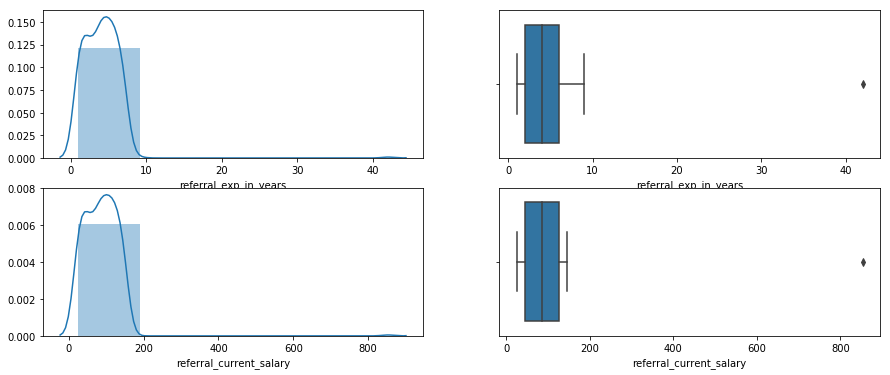

In [19]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(15,6))
sns.distplot(df['referral_exp_in_years'],bins=5,ax=ax[0][0])
sns.boxplot(data=df,x='referral_exp_in_years',ax=ax[0][1])
sns.distplot(df['referral_current_salary'],bins=5,ax=ax[1][0])
sns.boxplot(data=df,x='referral_current_salary',ax=ax[1][1])
plt.show()

/home/daniel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


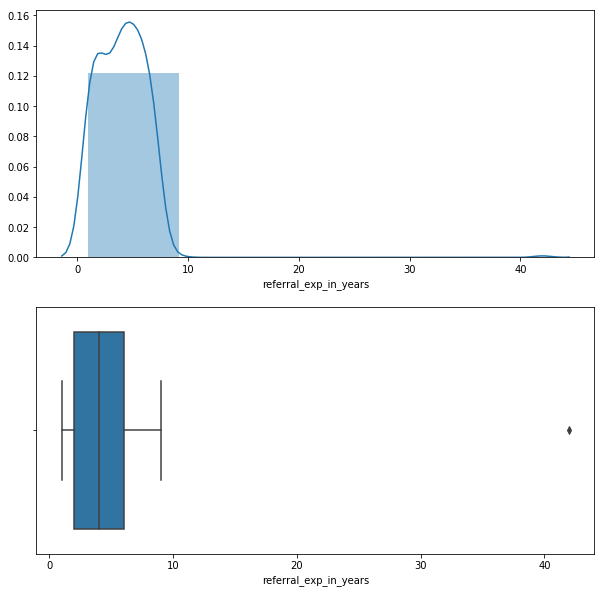

In [20]:
fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(10,10))
sns.distplot(df['referral_exp_in_years'],bins=5,ax=ax[0])
sns.boxplot(data=df,x='referral_exp_in_years',ax=ax[1])

plt.show()

We can understand there are some outliers gor the both variables

In [21]:
df['referral_preferred_city'].value_counts()

Mumbai       232
Bangalore    142
Delhi         93
Pune          32
Name: referral_preferred_city, dtype: int64

In [22]:
# numbers will be printed in $ format
df['referral_preferred_city'].value_counts(normalize=True)

Mumbai       0.464930
Bangalore    0.284569
Delhi        0.186373
Pune         0.064128
Name: referral_preferred_city, dtype: float64

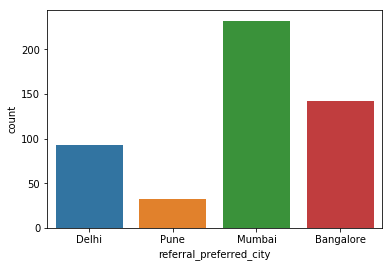

In [23]:
sns.countplot(data=df,x='referral_preferred_city')

 So Mumbai city has more referral

# Bivariate Analysis

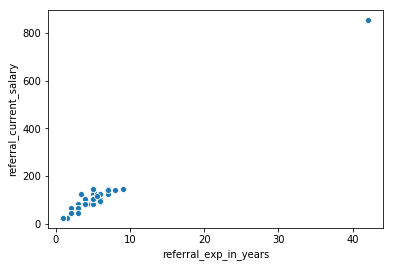

In [24]:
sns.scatterplot(x='referral_exp_in_years',y='referral_current_salary',data=df)

When experience is increasing, salary also increasing
but there is the some outliers also should be noticed

In [25]:
df[df['referral_exp_in_years'] > 15]

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
354,355,65,42.0,Mumbai,853,61.0,95,61.0,68.0,Male,870.0,2.17,33.48,29.13,7.0,3,868,EL0,No


We can see experience is 42 and salary also high.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
referral_id                            499 non-null int64
referral_age                           499 non-null int64
referral_exp_in_years                  499 non-null float64
referral_preferred_city                499 non-null object
referral_current_salary                499 non-null int64
referral_10_th_marks                   499 non-null float64
referral_12th_marks                    499 non-null int64
referral_graduation_marks              499 non-null float64
referral_post_grad_marks               499 non-null float64
referral_gender                        499 non-null object
referral_expected_sal                  499 non-null float64
referral_aptitude_numerical_score      499 non-null float64
referral_aptitude_verbal_score         499 non-null float64
referral_aptitude_reasoning_score      499 non-null float64
referral_Management_Interview_score    499 non-null float64
refer

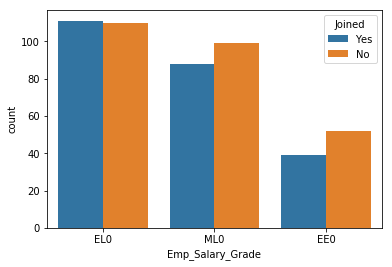

In [27]:
sns.countplot(x='Emp_Salary_Grade',hue='Joined',data=df)

We can see the ELO category people who joined more and EE0 is less

In [28]:
pd.crosstab(df['Emp_Salary_Grade'],df['Joined'])

Joined,No,Yes
Emp_Salary_Grade,,
EE0,52,39
EL0,110,111
ML0,99,88


You can understand like confusion metrics

In [29]:
pd.crosstab(df['Emp_Salary_Grade'],df['Joined'],normalize=True,margins=True)

Joined,No,Yes,All
Emp_Salary_Grade,,,
EE0,0.104208,0.078156,0.182365
EL0,0.220441,0.222445,0.442886
ML0,0.198397,0.176353,0.374749
All,0.523046,0.476954,1.000000


Totally 47 % people joined where 22 % of people form EL0

In [30]:
pd.crosstab(df['Emp_Salary_Grade'],df['Joined'],margins=True)

Joined,No,Yes,All
Emp_Salary_Grade,,,
EE0,52,39,91
EL0,110,111,221
ML0,99,88,187
All,261,238,499


In [31]:
#Categorical vs Numerical

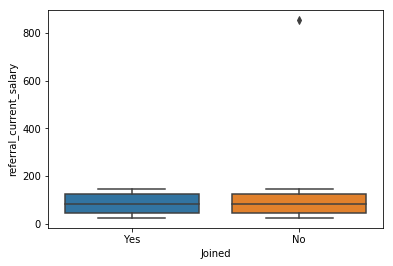

In [32]:
sns.boxplot(x='Joined',y='referral_current_salary',data=df)


Observation is herem there is no much differences in the salary. It is almost same. But can see one outlier

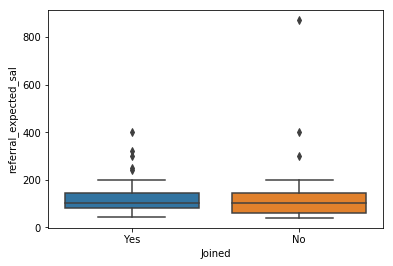

In [33]:
sns.boxplot(x='Joined',y='referral_expected_sal',data=df)

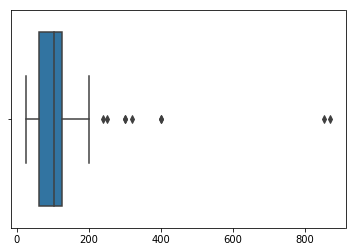

In [34]:
sns.boxplot(df[['referral_expected_sal','referral_current_salary']])

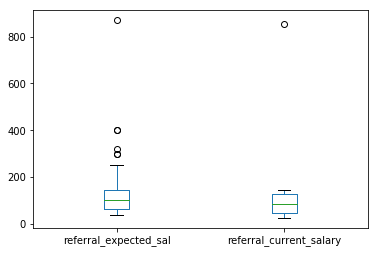

In [35]:
df[['referral_expected_sal','referral_current_salary']].plot(kind='box')

Mostly current and expected salaries are same but expected salary is slightly high and having outliers

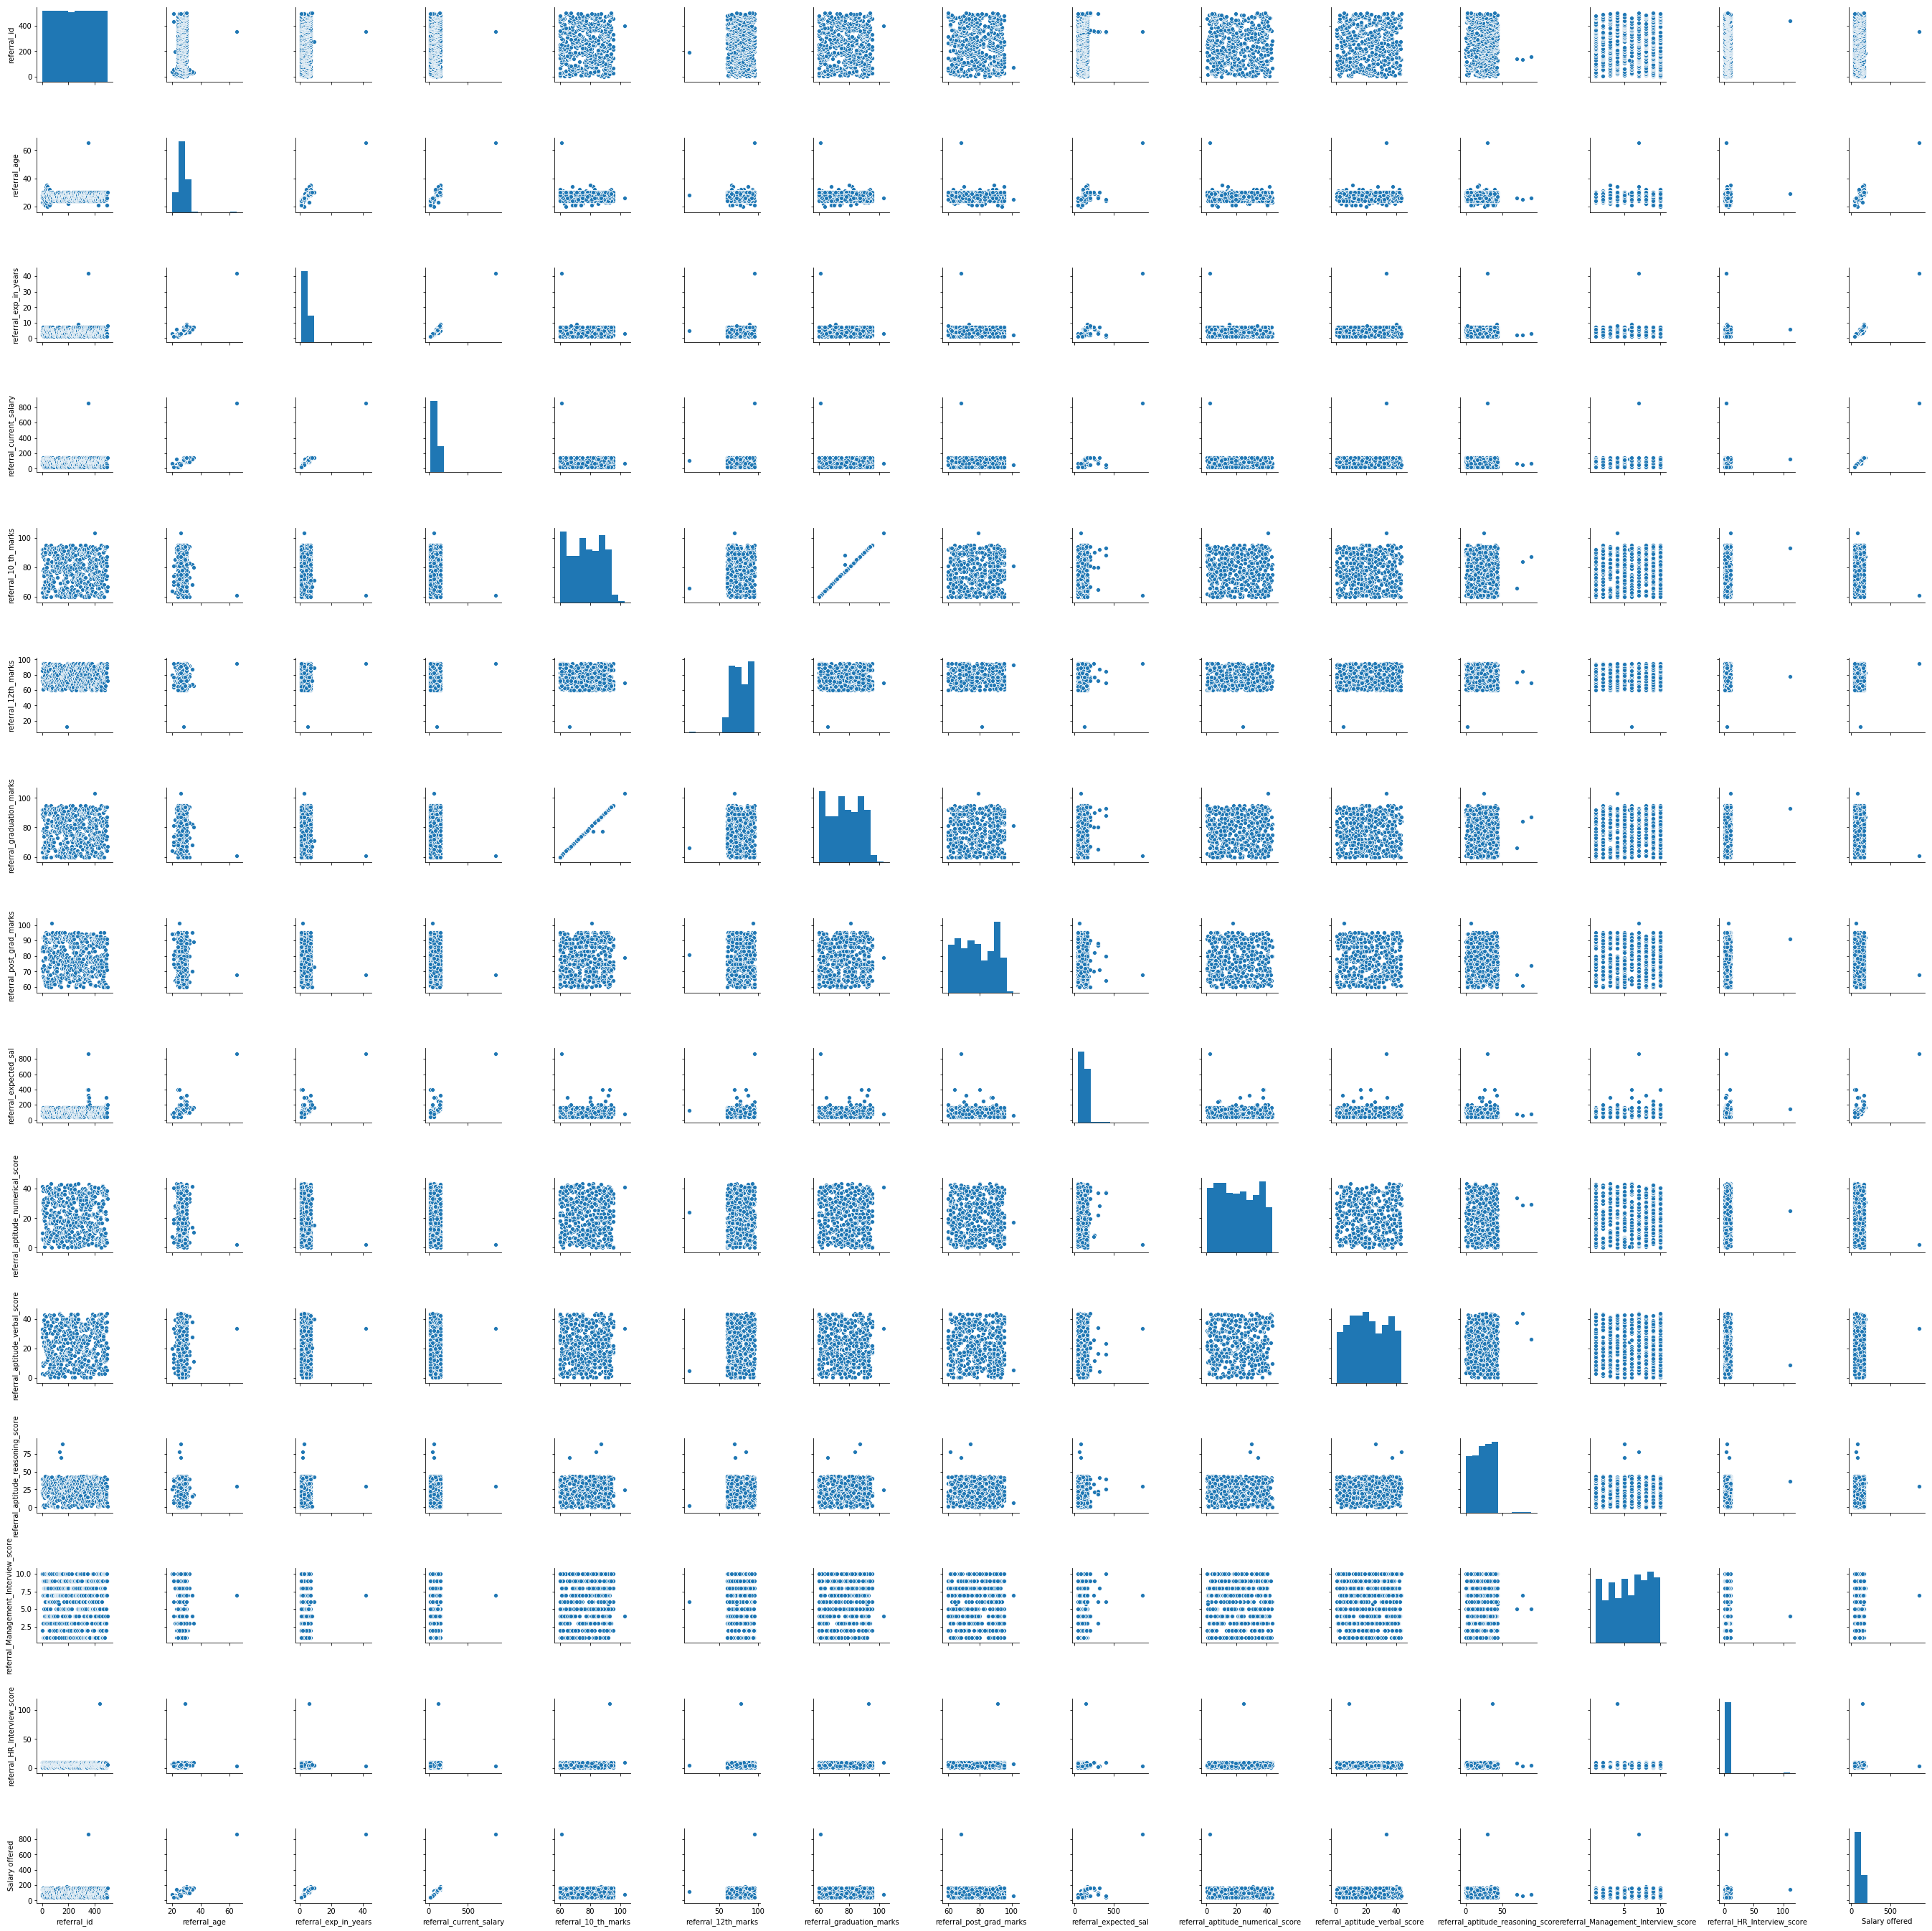

In [36]:
sns.pairplot(df)

 As you can see, salary_offered vs refferal_age,referral_ex_in_years and referral_current_salary gives some increasing treng
 graduation_marks and 10_th_marks also giving linear relationship
 Also, there are some outliers

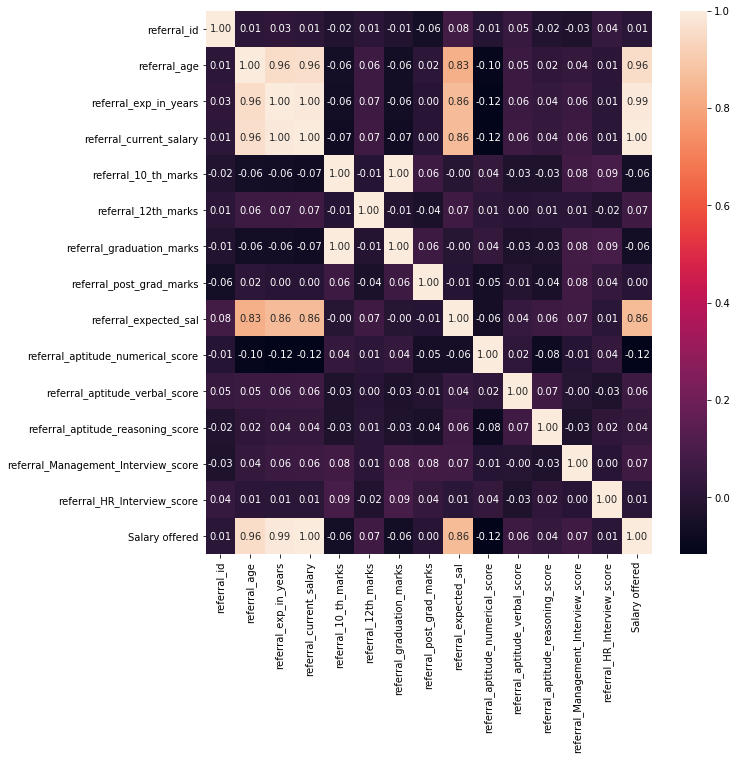

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt='.2f')
plt.show()

# Multivariate Analysis

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
referral_id                            499 non-null int64
referral_age                           499 non-null int64
referral_exp_in_years                  499 non-null float64
referral_preferred_city                499 non-null object
referral_current_salary                499 non-null int64
referral_10_th_marks                   499 non-null float64
referral_12th_marks                    499 non-null int64
referral_graduation_marks              499 non-null float64
referral_post_grad_marks               499 non-null float64
referral_gender                        499 non-null object
referral_expected_sal                  499 non-null float64
referral_aptitude_numerical_score      499 non-null float64
referral_aptitude_verbal_score         499 non-null float64
referral_aptitude_reasoning_score      499 non-null float64
referral_Management_Interview_score    499 non-null float64
refer

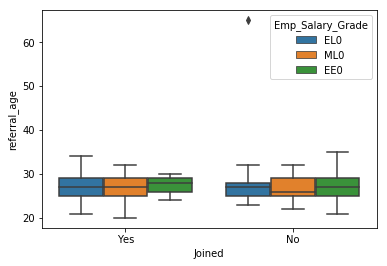

In [49]:
sns.boxplot(x='Joined',y='referral_age',hue='Emp_Salary_Grade',data=df)

Observation : median age of the employees who have joined in EE0 is high

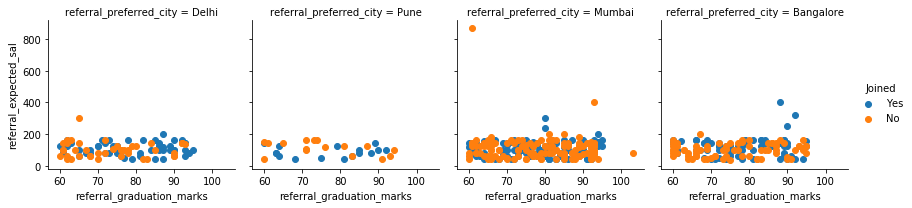

In [61]:
g=sns.FacetGrid(df,col='referral_preferred_city',hue='Joined')
g=g.map(plt.scatter,'referral_graduation_marks','referral_expected_sal')
g.add_legend()

Observation : It is giving scatter plot referral_graduation_marks vs referral_expected_sal 
    for each referral_preferred_city by splitting with Joined status.People having joined in Mumbai and Bangalore mostly
    and there are some higer salary also
    